In [1]:
#https://colab.research.google.com/drive/109vu3F1LTzD1gdVV6cho9fKGx7lzbFll
import torch
torch.manual_seed(123)
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.nn.functional as F
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.  
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision
from torchvision import datasets
#import os
import pandas as pd
import PIL
import time
import numpy as np
from skimage import io
from torch.utils.data import (
    Dataset,
    DataLoader,
)  # Gives easier dataset managment and creates mini batches

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 400, 400

def show_Augdataset(dataset, n=4): # n = no of augmented imgs from 1 img that drawn/has no effect on train acc.
  img = np.vstack((np.hstack((np.asarray(dataset[i][0][0]) for _ in range(n)))
                   for i in range(len(dataset))))
  plt.imshow(img)
  plt.axis('off')

In [3]:
transforms_Aug = torchvision.transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((32,32)),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        transforms.ColorJitter(hue=.05, saturation=.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20, resample=PIL.Image.BILINEAR)])

train_set_Aug=torchvision.datasets.ImageFolder(root="New_data/Train",transform=transforms_Aug)
#print(len(train_set_Aug))



<ipython-input-2-f9f9670345a7>:10: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  img = np.vstack((np.hstack((np.asarray(dataset[i][0][0]) for _ in range(n)))


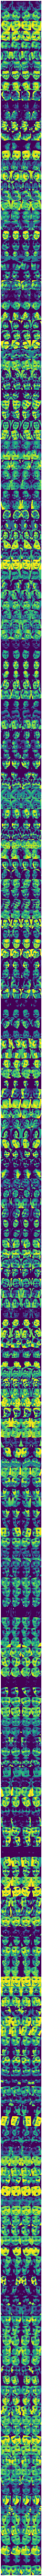

In [4]:
show_Augdataset(train_set_Aug)

In [5]:
# Load Data
valid_set=torchvision.datasets.ImageFolder(root="New_data/Valid",transform=transforms_Aug)
#print(type(train_set))

In [6]:
#train_set, test_set = torch.utils.data.random_split(dataset, [9325, 3996])
train_loader = DataLoader(dataset=train_set_Aug, batch_size=4, shuffle=True)
valid_loader = DataLoader(dataset=valid_set, batch_size=4, shuffle=False)
classes=('Down','Normal')

print(valid_loader)
print(train_loader)

In [9]:
def imshow(train_set_Aug):
    train_set_Aug = train_set_Aug / 2 + 0.5     # unnormalize
    npimg = train_set_Aug.numpy() # convert train_set to np
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # to display images on x axis
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(type(labels)) #type of label= tensor, type of image is tensor

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))#its max value =4(batch size) 

<class 'torch.Tensor'>


 Down  Down  Down  Down


In [7]:
#CNN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


In [8]:
#Loss Fun. and Optimizer
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

In [9]:
start_time = time.time()
for epoch in range(10):
    # loop over the dataset multiple times to train model on train_set
    
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        #print(inputs.dtype)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 20 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0
    
print('Finished Training')
print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\zeinab walid\anaconda3\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


[1,    20] loss: nan
[1,    40] loss: nan
[1,    60] loss: nan
[2,    20] loss: nan
[2,    40] loss: nan
[2,    60] loss: nan
[3,    20] loss: nan
[3,    40] loss: nan
[3,    60] loss: nan
[4,    20] loss: nan
[4,    40] loss: nan
[4,    60] loss: nan
[5,    20] loss: nan
[5,    40] loss: nan
[5,    60] loss: nan
[6,    20] loss: nan
[6,    40] loss: nan
[6,    60] loss: nan
[7,    20] loss: nan
[7,    40] loss: nan
[7,    60] loss: nan
[8,    20] loss: nan
[8,    40] loss: nan
[8,    60] loss: nan
[9,    20] loss: nan
[9,    40] loss: nan
[9,    60] loss: nan
[10,    20] loss: nan
[10,    40] loss: nan
[10,    60] loss: nan
Finished Training
--- 16.85715126991272 seconds ---


In [10]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
## acc of train images
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the  train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the  train images: 55 %


In [12]:
## acc of each class on train data

class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels)

        if(labels.size()==torch.Size([4])):
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


for i in range(2):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of  Down : 100 %
Accuracy of Normal :  0 %


Confusion matrix, without normalization
[[142   0]
 [116   0]]


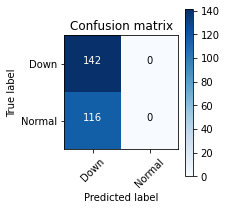

In [13]:
## plot confusion matrix for train data
from sklearn.metrics import confusion_matrix

target_arr = np.empty([0])
pred_arr = np.empty([0,0])
for data in train_loader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    targets = labels.numpy()
    pred = predicted.numpy()
    target_arr = np.append(target_arr, targets)
    pred_arr = np.append(pred_arr, pred)

cm = confusion_matrix(target_arr, pred_arr)

plt.figure(figsize=(3,3))
plot_confusion_matrix(cm, classes)

In [36]:
model=Net()
PATH="saved_model.pt"
torch.save(model.state_dict(), PATH)

In [37]:
model=Net()
model.load_state_dict(torch.load(PATH))
model.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [14]:
#Test the network on the test data (1 batch only)
dataiter = iter(valid_loader)
images, labels = dataiter.next()

# print images
#imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

GroundTruth:   Down  Down  Down  Down


In [15]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)


print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   Down  Down  Down  Down


In [16]:
correct = 0
total = 0
with torch.no_grad():
    for data in valid_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on validation images: %d %%' % (
    100 * correct / total))

Accuracy of the network on validation images: 50 %


In [17]:
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in valid_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        if(labels.size()==torch.Size([4])):
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


for i in range(2):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of  Down : 100 %
Accuracy of Normal :  0 %


In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [20]:
from PIL import Image
from torch.autograd import Variable
#from IPython.display import Image
def predict_image(image_path):
    print("Prediction in progress")
    image = Image.open(image_path)

    # Define transformations for the image, should (note that imagenet models are trained with image size 224)
    transformation = transforms.Compose([
                     transforms.ToTensor(),
                     transforms.Resize((32, 32)),
                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    # Preprocess the image
    image_tensor = transformation(image).float()

    # Add an extra batch dimension since pytorch treats all images as batches
    image_tensor = image_tensor.unsqueeze_(0)

    #if torch.cuda.is_available():
        #image_tensor.cuda()

    # Turn the input into a Variable
    input = Variable(image_tensor)

    # Predict the class of the image
    output = net(input)

    index = output.data.numpy().argmax()

    return index,image_tensor  #class_map[str(index)][1]
index,image_tensor = predict_image("New_data/test_data/9.png")
imshow(torchvision.utils.make_grid(image_tensor))
print('new_Img: ', ' '.join('%5s' % classes[index]))

Prediction in progress


NameError: name 'imshow' is not defined